## 2절. 분포와 추론

### 2.1 표본과 실험

### 2.2 분포

In [1]:
# 이산형 확률분포
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(1)

binomial = np.random.binomial(10, 0.5, 100)
np.histogram(binomial)

(array([ 1,  1,  6, 14,  0, 16, 25, 20, 12,  5], dtype=int64),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. , 4.8, 5.6, 6.4, 7.2, 8. ]))

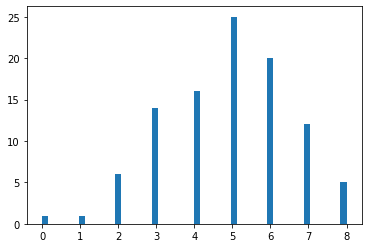

In [2]:
# 이항분포
plt.hist(binomial, bins=50)
plt.show()

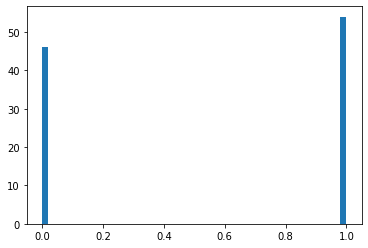

In [3]:
# 베르누이 분포
bernoulli = np.random.binomial(1, 0.5, 100)
plt.hist(bernoulli, bins=50)
plt.show()

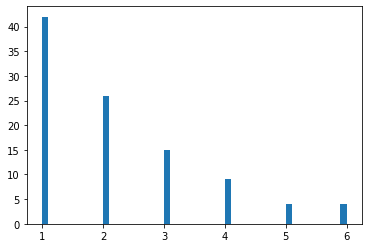

In [4]:
# 기하분포
geome = np.random.geometric(0.5, 100)
plt.hist(geome, bins=50)
plt.show()

In [5]:
# 다항 분포
multi = np.random.multinomial(n=20, pvals=[1/6.]*6, size=1)
multi

array([[5, 5, 3, 2, 1, 4]])

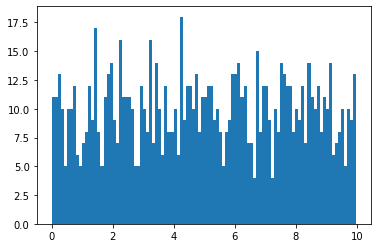

In [6]:
# 연속형 확률분포
# 균일분포
unif = np.random.uniform(0, 10, 1000)
plt.hist(unif, bins=100)
plt.show()

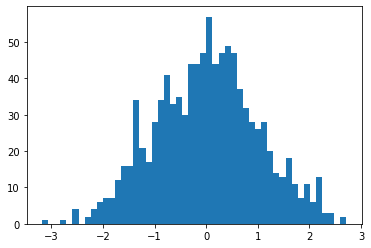

In [7]:
# 정규분포
norm = np.random.normal(0, 1, 1000)
plt.hist(norm, bins=50)
plt.show()

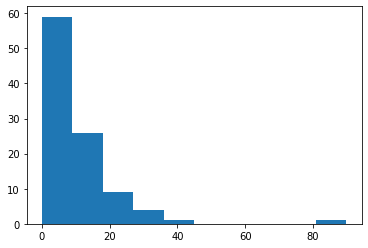

In [8]:
# 지수분포
expo = np.random.exponential(10, 100)
plt.hist(expo, bins=10)
plt.show()

### 2.3 추정과 가설검정

## 3절. 상관분석

### 3.1 피어슨 상관계수

In [9]:
import seaborn as sns

iris = sns.load_dataset('iris')
iris.corr(method='pearson')

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


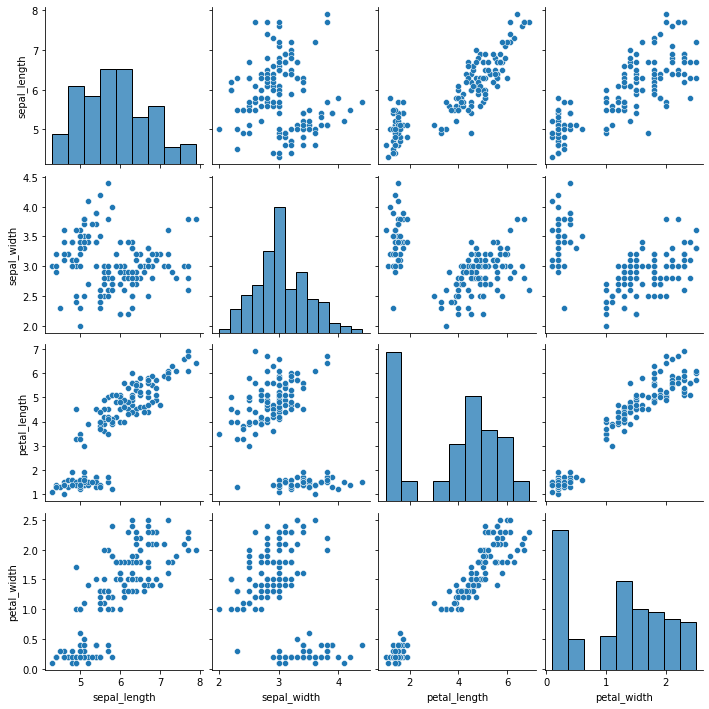

In [10]:
sns.pairplot(iris)

In [11]:
from scipy.stats import pearsonr

# return value: (피어슨 상관계수, p-value)
pearsonr(iris.petal_length, iris.petal_width)

'''
    유의확률 (p-value)이 0.05보다 작으므로 귀무가설 기각
    꽃잎 길이와 꽃잎 너비는 관계가 있다. 즉 상관관계가 있다.
'''

'\n    유의확률 (p-value)이 0.05보다 작으므로 귀무가설 기각\n    꽃잎 길이와 꽃잎 너비는 관계가 있다. 즉 상관관계가 있다.\n'

<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>

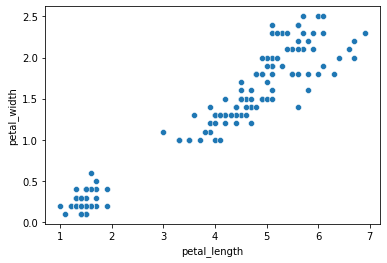

In [12]:
import warnings
warnings.filterwarnings('ignore')

sns.scatterplot(iris.petal_length, iris.petal_width)

### 3.2 스피어만 상관계수

In [13]:
iris = sns.load_dataset('iris')
iris.corr(method='spearman')

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.166778,0.881898,0.834289
sepal_width,-0.166778,1.000000,-0.309635,-0.289032
petal_length,0.881898,-0.309635,1.000000,0.937667
petal_width,0.834289,-0.289032,0.937667,1.000000


In [14]:
from scipy.stats.stats import spearmanr

spearmanr(iris.petal_length, iris.petal_width)

SpearmanrResult(correlation=0.9376668235763412, pvalue=8.156596854126675e-70)

### 3.3 상관계수 시각화

In [15]:
iris = sns.load_dataset('iris')

iris.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


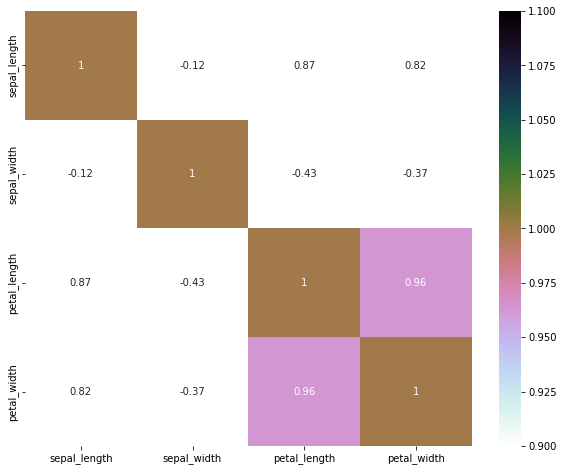

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(iris.corr(), vmin=1, vmax=1, annot=True, cmap='cubehelix_r')
plt.show()

## 4절. 단순 회귀분석

### 4.1 행렬을 이용한 회귀모형 구하기

In [17]:
x = [32, 64, 96, 118, 126, 144, 152, 158]
y = [17, 24, 62, 49, 52, 105, 130, 125]

import numpy as np
a = np.c_[x, np.ones(8)]
b = np.array(y)

print(a)
print(b)

[[ 32.   1.]
 [ 64.   1.]
 [ 96.   1.]
 [118.   1.]
 [126.   1.]
 [144.   1.]
 [152.   1.]
 [158.   1.]]
[ 17  24  62  49  52 105 130 125]


In [18]:
# 행렬 내적, 곱
model = np.linalg.inv(a.T @ a) @ a.T @ b
model

# y=ax+b에서 a(weight) = 0.87962664, b(bias) = -27.35846347

array([  0.87962664, -27.35846347])

### 4.2 회귀모형과 예측

In [19]:
X = [32, 64, 96, 118, 126, 144, 152, 158]
Y = [17, 24, 62, 49, 52, 105, 130, 125]

from scipy import stats

slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)

print(f"slope: {slope}")
print(f"intercept: {intercept}")
print(f"r_value: {r_value}")
print(f"p_value: {p_value}")
print(f"std_err: {std_err}")

'''
    - 구해진 회귀식: y = 0.8796*x - 27.3585
    - p-value(유의확률)가 0.05보다 작으므로 유의수준 5%하에서 회귀식이 유의함
    - r-value(결정계수)는 회귀식이 데이터를 약 89% 설명함.
'''

slope: 0.8796266379465087
intercept: -27.3584634715491
r_value: 0.89008928103186
p_value: 0.003051790677096642
std_err: 0.18388671751663876


'\n    - 구해진 회귀식: y = 0.8796*x - 27.3585\n    - p-value(유의확률)가 0.05보다 작으므로 유의수준 5%하에서 회귀식이 유의함\n    - r-value(결정계수)는 회귀식이 데이터를 약 89% 설명함.\n'

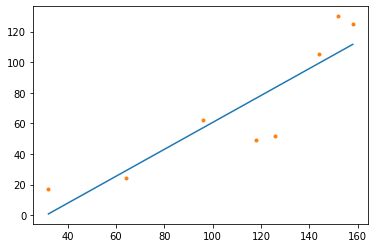

In [20]:
%matplotlib inline
plt.plot(X, slope*np.array(X) + intercept, '-')
plt.plot(X, Y, '.')
plt.show()

In [21]:
# 최소제곱 다항 회귀식 계산
X = [32, 64, 96, 118, 126, 144, 152, 158]
Y = [17, 24, 62, 49, 52, 105, 130, 125]

# 1차 회귀식
fit = np.polyfit(X, Y, 1)
print(fit)

# 다항식 함수 생성
fit_fn = np.poly1d(fit)
print(fit_fn)

[  0.87962664 -27.35846347]
 
0.8796 x - 27.36


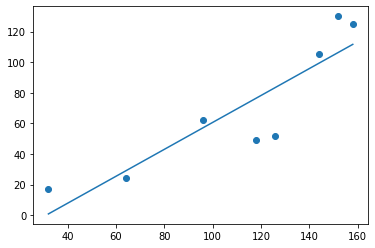

In [22]:
plt.scatter(X, Y)
plt.plot(X, fit_fn(X))
plt.show()

[-6.18327318e-09  3.46694642e-06 -7.70219609e-04  8.62372828e-02
 -5.09766458e+00  1.50398974e+02 -1.70364025e+03]
            6             5             4           3         2
-6.183e-09 x + 3.467e-06 x - 0.0007702 x + 0.08624 x - 5.098 x + 150.4 x - 1704


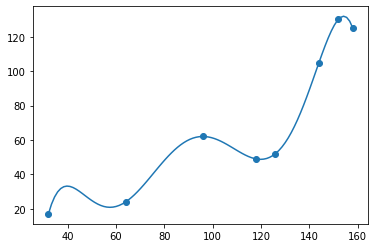

In [23]:
# 2차 방정식으로 표현
# fit = np.polyfit(X, Y, 2)
# fit_fn = np.poly1d(fit)
# sample_X = np.linspace(30, 160, 100)

# plt.scatter(X, Y)
# plt.plot(sample_X, fit_fn(sample_X))
# plt.show()

# 차수 유동화 반영 회귀 그래프 함수
def draw_polyfit(X, Y, deg=1):
    fit = np.polyfit(X, Y, deg)
    print(fit)
    fit_fn = np.poly1d(fit)
    print(fit_fn)
    
    sample_X = np.linspace(min(X), max(X), 100)
    
    plt.scatter(X, Y)
    plt.plot(sample_X, fit_fn(sample_X))
    plt.show()

draw_polyfit(X, Y, 6)

## 5절. 포뮬러를 이용한 회귀식

In [24]:
X = [32, 64, 96, 118, 126, 144, 152, 158]
Y = [17, 24, 62, 49, 52, 105, 130, 125]

import pandas as pd
import numpy as np

df = pd.DataFrame(np.c_[X, Y], columns=['x', 'y'])
df

,x,y
0,32,17
1,64,24
2,96,62
3,118,49
4,126,52
5,144,105
6,152,130
7,158,125


In [25]:
# 포뮬러를 이용한 선형회귀식 구현
# 1차방정식
from statsmodels.formula.api import ols

model = ols('y ~ x', data=df)
result = model.fit()
result.params

Intercept   -27.358463
x             0.879627
dtype: float64

In [26]:
import statsmodels.api as sm

model = sm.OLS.from_formula('y ~ x', data=df)
result = model.fit()
result.params

Intercept   -27.358463
x             0.879627
dtype: float64

In [27]:
# 상수항을 포함하지 않는 3차방정식
# I() 함수는 포뮬러가 수식을 포함할 경우 사용
model2 = ols('y ~ x + I(x**2) + I(x**3) - 1', data=df)
result2 = model2.fit()
result2.params

x            1.005637
I(x ** 2)   -0.013981
I(x ** 3)    0.000082
dtype: float64

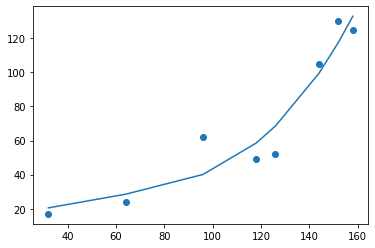

In [28]:
# 회귀모형으로 예측한 값
y_ = result2.predict(df.x)

import matplotlib.pyplot as plt

plt.scatter(X, Y)
plt.plot(X, y_)
plt.show()

## 6절. 정규화 선형회귀

### 6.1 정규화 선형회귀모형

In [29]:
# Lasso, Ridge, Elastic-Net Linear Model

### 6.2 statsmodels의 정규화 회귀모형

In [30]:
import numpy as np
n_samples = 30
np.random.seed(0)

X = np.sort(np.random.rand(n_samples))
y = np.sin(2*np.pi * X) + np.random.randn(n_samples) * 0.1

X, y

(array([0.0202184 , 0.07103606, 0.0871293 , 0.11827443, 0.14335329,
        0.38344152, 0.41466194, 0.4236548 , 0.43758721, 0.46147936,
        0.52184832, 0.52889492, 0.54488318, 0.5488135 , 0.56804456,
        0.60276338, 0.63992102, 0.64589411, 0.71518937, 0.77815675,
        0.78052918, 0.79172504, 0.79915856, 0.83261985, 0.87001215,
        0.891773  , 0.92559664, 0.94466892, 0.96366276, 0.97861834]),
 array([ 0.21313815,  0.35744392,  0.74748666,  0.53116691,  0.78834718,
         0.64990691,  0.66414648,  0.60844099,  0.39767186,  0.27749244,
        -0.22562487, -0.37863606, -0.31307741, -0.28628347, -0.29160131,
        -0.48150477, -0.80892952, -0.82381604, -1.08103092, -1.12639327,
        -1.15228581, -0.7707533 , -1.00364218, -0.91206561, -0.85419591,
        -0.55105199, -0.61203691, -0.36196849, -0.31588187, -0.09525091]))

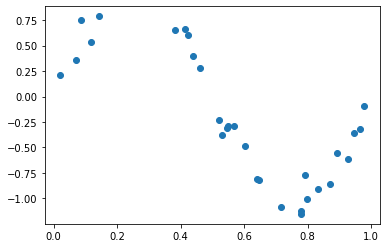

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(X, y)
plt.show()

In [32]:
import pandas as pd
from statsmodels.formula.api import ols

df = pd.DataFrame(np.c_[X, y], columns=['x', 'y'])
df.head()

,x,y
0,0.020218,0.213138
1,0.071036,0.357444
2,0.087129,0.747487
3,0.118274,0.531167
4,0.143353,0.788347


In [33]:
model = ols('y ~ x', data=df)
result = model.fit()
result.params

Intercept    0.713959
x           -1.642204
dtype: float64

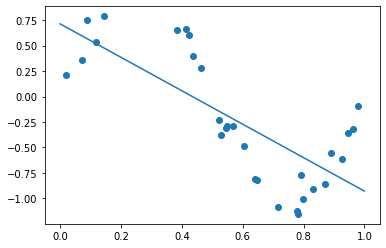

In [34]:
plt.scatter(X, y)
xx = np.linspace(0, 1, 1000)
plt.plot(xx, result.predict({'x':xx}))
plt.show()

In [35]:
# 정규화를 하지 않는 회귀모형
# ols() 함수를 이용한 9차 방정식

model9 = ols("y ~ x + I(x**2) + I(x**3) + I(x**4) + I(x**5) + I(x**6) + I(x**7) + I(x**8) + I(x**9)", data=df)
result9 = model9.fit()
result9.params

Intercept       -0.169863
x               25.735773
I(x ** 2)     -428.141683
I(x ** 3)     3866.723114
I(x ** 4)   -18340.939663
I(x ** 5)    49326.072543
I(x ** 6)   -78884.743070
I(x ** 7)    74538.645149
I(x ** 8)   -38453.132189
I(x ** 9)     8350.254985
dtype: float64

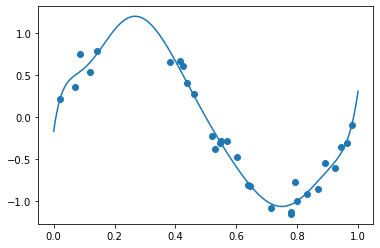

In [36]:
plt.scatter(X, y)
plt.plot(xx, result9.predict({'x':xx}))
plt.show()

In [37]:
# Lasso Linear model
result9_lasso = model9.fit_regularized(L1_wt=1, alpha=0.01)
result9_lasso.params

Intercept    0.687949
x           -1.129134
I(x ** 2)   -1.124878
I(x ** 3)    0.000000
I(x ** 4)    0.000000
I(x ** 5)    0.000000
I(x ** 6)    0.000000
I(x ** 7)    0.000000
I(x ** 8)    0.281484
I(x ** 9)    1.075281
dtype: float64

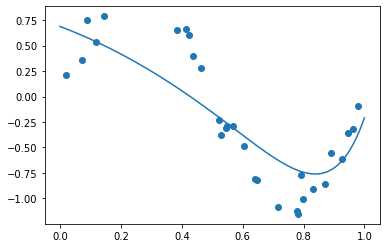

In [38]:
plt.scatter(X, y)
plt.plot(xx, result9_lasso.predict({'x':xx}))
plt.show()

In [39]:
# ridge linear model
result9_ridge = model9.fit_regularized(L1_wt=0, alpha=0.01)
result9_ridge.params

array([ 0.63308745, -0.75705866, -1.07056551, -0.76835135, -0.35530367,
        0.0121939 ,  0.29917825,  0.50969248,  0.65793698,  0.75851865])

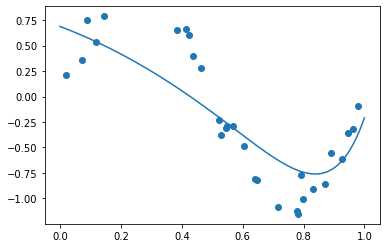

In [40]:
plt.scatter(X, y)
plt.plot(xx, result9_lasso.predict({'x':xx}))
plt.show()

In [41]:
# elastic-net linear model
result9_elastic_net = model9.fit_regularized(L1_wt=0.5, alpha=0.01)
result9_elastic_net.params

Intercept    0.656203
x           -0.849745
I(x ** 2)   -1.262902
I(x ** 3)   -0.425687
I(x ** 4)    0.000000
I(x ** 5)    0.000000
I(x ** 6)    0.000000
I(x ** 7)    0.304049
I(x ** 8)    0.631908
I(x ** 9)    0.801206
dtype: float64

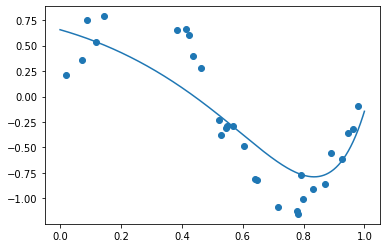

In [42]:
plt.scatter(X, y)
plt.plot(xx, result9_elastic_net.predict({'x':xx}))
plt.show()

### 6.3 Scikit-Learn의 정규화 회귀모형

In [43]:
# 일반 회귀모형 생성
import statsmodels.api as sm

# generate sample data
np.random.seed(0)
n_samples = 30
x = np.sort(np.random.rand(n_samples))
y = np.sin(2*np.pi * x) + np.random.randn(n_samples) * 0.1

x = x[:, np.newaxis]

In [44]:
def plot_model(model):
    plt.scatter(X, y)
    x = np.linspace(0, 1, 1000)
    plt.plot(x, model.predict(x[:, np.newaxis]))
    plt.show()

[ 0.00000000e+00  2.57357731e+01 -4.28141684e+02  3.86672312e+03
 -1.83409397e+04  4.93260726e+04 -7.88847431e+04  7.45386452e+04
 -3.84531322e+04  8.35025499e+03]


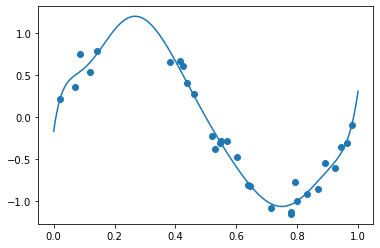

In [45]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

poly = PolynomialFeatures(9)
model = make_pipeline(poly, LinearRegression()).fit(x, y)
print(model.steps[1][1].coef_)
plot_model(model)

[ 0.         -0.07668852 -2.44096313 -0.         -0.          0.
  0.          0.          0.          1.88188725]


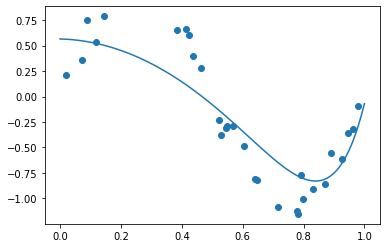

In [46]:
# Lasso 회귀모형
from sklearn.linear_model import Lasso
model = make_pipeline(poly, Lasso(alpha=0.01)).fit(x, y)
print(model.steps[1][1].coef_)
plot_model(model)

[ 0.          1.51430399 -3.90160797 -2.6359859  -0.41526792  1.07530175
  1.64913273  1.52026782  0.94651401  0.13299614]


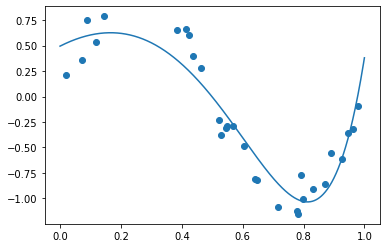

In [47]:
# Ridge 회귀모형
from sklearn.linear_model import Ridge
model = make_pipeline(poly, Ridge(alpha=0.01)).fit(x, y)
print(model.steps[1][1].coef_)
plot_model(model)

[ 0.         -0.83768018 -1.23944649 -0.50166684 -0.          0.
  0.          0.30382246  0.62459231  0.84262899]


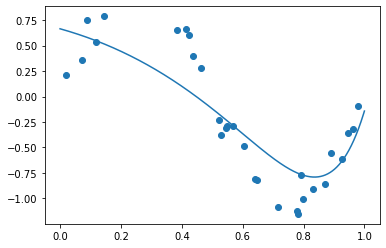

In [48]:
# Elastic Net 회귀모형
from sklearn.linear_model import ElasticNet
model = make_pipeline(poly, ElasticNet(alpha=0.01, l1_ratio=0.5)).fit(x, y)
print(model.steps[1][1].coef_)
plot_model(model)

### 6.4 Ridge 모형과 Lasso 모형의 차이

In [49]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()

x = diabetes.data
y = diabetes.target

In [50]:
# generate Ridge model
alpha = np.logspace(-3, 1, 5)
data = []

for i, a in enumerate(alpha):
    ridge = Ridge(alpha=a).fit(x, y)
    data.append(pd.Series(np.hstack([ridge.intercept_, ridge.coef_])))

In [51]:
df_ridge = pd.DataFrame(data, index=alpha).T
df_ridge

,0.001,0.010,0.100,1.000,10.000
0,152.133484,152.133484,152.133484,152.133484,152.133484
1,-9.551414,-7.199457,1.307349,29.465746,19.812822
2,-239.090354,-234.552930,-207.194814,-83.154885,-0.918458
3,520.363367,520.583136,489.691080,306.351627,75.416167
4,323.828627,320.523356,301.769437,201.629434,55.025419
5,-712.328205,-380.607066,-83.466074,5.909369,19.924600
6,413.383794,150.483752,-70.828096,-29.515927,13.948686
7,65.811629,-78.591232,-188.680164,-152.040465,-47.553816
8,167.513774,130.313059,115.712703,117.311715,48.259420
9,720.944468,592.349587,443.814054,262.944995,70.144068


In [52]:
# generate Lasso model
alpha = np.logspace(-3, 1, 5)
data = []

for i, a in enumerate(alpha):
    lasso = Lasso(alpha=a).fit(x, y)
    data.append(pd.Series(np.hstack([lasso.intercept_, lasso.coef_])))

In [53]:
df_lasso = pd.DataFrame(data, index=alpha).T
df_lasso

,0.001,0.010,0.100,1.000,10.000
0,152.133484,152.133484,152.133484,152.133484,152.133484
1,-8.998449,-1.306575,-0.000000,0.000000,0.000000
2,-238.899740,-228.822331,-155.362882,-0.000000,0.000000
3,520.261362,525.560658,517.182017,367.701852,0.000000
4,323.429484,316.175320,275.082351,6.301904,0.000000
5,-720.251734,-307.013677,-52.540269,0.000000,0.000000
6,421.405141,89.321688,-0.000000,0.000000,0.000000
7,66.734168,-105.081398,-210.159753,-0.000000,-0.000000
8,164.448873,119.597989,0.000000,0.000000,0.000000
9,725.340440,571.330871,483.914409,307.605700,0.000000


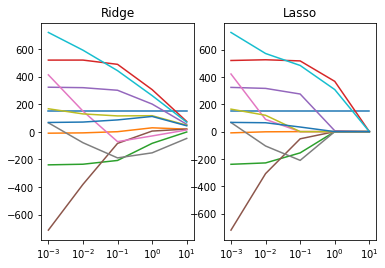

In [54]:
# ridge, lasso visualization
%matplotlib inline

ax1 = plt.subplot(121)
plt.semilogx(df_ridge.T)
plt.xticks(alpha, label=np.log10(alpha))
plt.title('Ridge')

ax2 = plt.subplot(122)
plt.semilogx(df_lasso.T)
plt.xticks(alpha, label=np.log10(alpha))
plt.title('Lasso')
plt.show()

## 7절. 다중회귀분석

### 7.1 다중 회귀의 변수 추정

### 7.2 다중회귀분석 예

In [55]:
from sklearn.datasets import load_boston
boston = load_boston()
X = boston.data
y = boston.target

In [56]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3)

In [58]:
# 회귀모형 생성
from sklearn.linear_model import LinearRegression
model_boston = LinearRegression()
model_boston.fit(train_X, train_y)

LinearRegression()

In [59]:
# 훈련 데이터셋 이용한 평가
model_boston.score(train_X, train_y)

0.7224912856655239

In [64]:
from sklearn.model_selection import cross_val_score
r2 = cross_val_score(model_boston, train_X, train_y, cv=5)
print(r2)
print(r2.mean())

[0.74514558 0.69041499 0.65921423 0.65352445 0.56368183]
0.6623962165346965


In [68]:
import math
from sklearn.metrics import mean_squared_error

rmse = math.sqrt(mean_squared_error(train_y, model_boston.predict(train_X)))
rmse

5.0100207705201605

In [69]:
# 예측하기
y_pred = model_boston.predict(test_X)
y_pred

array([13.68134948, 14.72822159, 17.56497914, 10.31353767, 18.29252101,
       19.85732201, 11.45659558, 21.02304362, 39.01118116, 23.22455551,
       19.95149739, 31.0753286 , 20.55149669, 17.07092377, 20.48655937,
       20.84775366, 20.69975726, 31.73753104, 21.30012715, 17.72154341,
       36.42506667, 30.83327813, 11.60932474, 37.47988163, 13.83746617,
       18.02755695, 23.28700537, 18.50683118, 18.75265029, 21.49966669,
       20.46156157, 19.20817821, 23.05932703, 36.32511556, 24.97543411,
       29.20494467, 20.60895554, 16.15183338, 19.84241368, 36.12506217,
       28.54258197,  6.73632825, 40.2437941 , 24.05132374, 23.78055186,
       12.10878764, 18.72016966, 14.99773347, 17.60279548, 17.9891877 ,
       25.58742536, 34.81417964, 27.35505181, 18.37851025, 14.35066137,
       20.30553803, 19.18502872, 20.80972543, 26.12716426, 21.53777508,
       15.7667025 , 33.74763347, 33.15282238, 16.15805566, 20.09972979,
       31.35370513, 28.68988917, 22.59371961, 22.859353  , 24.05

In [70]:
# 검증 데이터셋을 이용한 평가
rmse_test = math.sqrt(mean_squared_error(test_y, y_pred))
rmse_test

3.944200878859442

In [71]:
from sklearn.metrics import r2_score
r2_score(test_y, y_pred)

0.7732420592861823

### 7.3 다중회귀식의 추정방법

In [73]:
import statsmodels.api as sm

boston = sm.datasets.get_rdataset('Boston', package='MASS')
boston_df = boston.data
boston_df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [74]:
# 모든 변수를 이용하여 모형 생성하고 요약정보 출력
import statsmodels.formula.api as smf
formula = 'medv~' + '+'.join(boston_df.iloc[:, :-1].columns)
model_boston = smf.ols(formula=formula, data=boston_df).fit()
model_boston.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Sun, 09 Jan 2022   Prob (F-statistic):          6.72e-135
Time:                        22:08:35   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.000      26.432      46.487
crim          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
zn             0.0464      0.014      3.382      0.001       0.019       0.073
indus          0.0206      0.061      0.334      0.738      -0.100       0.141
chas           2.6867      0.862      3.118      0.002       0.994       4.380
nox          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
rm             3.8099      0.418      9.116      0.000       2.989       4.631
age            0.0007      0.013      0.052      0.958      -0.025       0.027
dis           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
rad            0.3060      0.066      4.613      0.000       0.176       0.436
tax           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
ptratio       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
black          0.0093      0.003      3.467      0.001       0.004       0.015
lstat         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [75]:
formula2 = 'medv~ rad + zn + rm + chas + age -1'
model_boston2 = smf.ols(formula=formula2, data=boston_df).fit()
model_boston2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   medv   R-squared (uncentered):                   0.932
Model:                            OLS   Adj. R-squared (uncentered):              0.931
Method:                 Least Squares   F-statistic:                              1363.
Date:                Sun, 09 Jan 2022   Prob (F-statistic):                   5.05e-289
Time:                        22:11:11   Log-Likelihood:                         -1654.6
No. Observations:                 506   AIC:                                      3319.
Df Residuals:                     501   BIC:                                      3340.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
rad           -0.2183      0.037     -5.924      0.000      -0.291      -0.146
zn             0.0161      0.015      1.056      0.291      -0.014       0.046
rm             4.7232      0.147     32.166      0.000       4.435       5.012
chas           5.6944      1.128      5.047      0.000       3.478       7.911
age           -0.0792      0.012     -6.358      0.000      -0.104      -0.055
==============================================================================
Omnibus:                      234.375   Durbin-Watson:                   0.708
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1253.471
Skew:                           2.008   Prob(JB):                    6.49e-273
Kurtosis:                       9.583   Cond. No.                         299.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 7.4 상관계수와 결정계수

### 7.5 회귀분석의 검증 요소들

In [76]:
# 잔차의 정규성
y_pred = model_boston2.predict(boston_df)

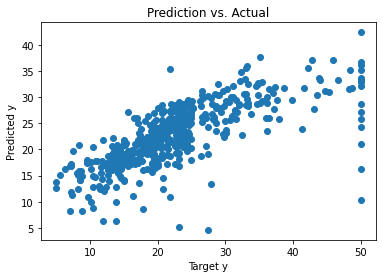

In [77]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure()

plt.scatter(boston_df.iloc[:, -1], y_pred)
plt.xlabel('Target y')
plt.ylabel('Predicted y')
plt.title('Prediction vs. Actual')
plt.show()

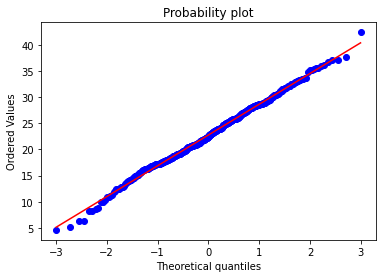

In [78]:
from scipy import stats

fig = plt.figure()
res = stats.probplot(y_pred, plot=plt)
plt.title('Probability plot')
plt.show()

### 7.6 이상치 탐색

In [89]:
influence = model_boston2.get_influence()
leverage = influence.hat_matrix_diag
len(leverage)

506

In [81]:
inf_df = influence.summary_frame()
inf_df.head()

,dfb_rad,dfb_zn,dfb_rm,dfb_chas,dfb_age,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
0,0.014158,-0.001691,-0.004468,0.004550,-0.005715,0.000086,-0.307386,0.004518,-0.020708,-0.307108,-0.020689
1,0.017086,0.006812,-0.005552,0.005430,-0.007745,0.000116,-0.320005,0.005648,-0.024118,-0.319718,-0.024097
2,-0.037099,-0.048103,0.060999,-0.014854,-0.024080,0.001287,0.947338,0.007118,0.080210,0.947241,0.080201
3,-0.015222,-0.045586,0.062027,-0.009620,-0.039300,0.000904,0.726654,0.008492,0.067248,0.726311,0.067216
4,-0.032230,-0.065823,0.086878,-0.016786,-0.047057,0.002031,1.159507,0.007496,0.100766,1.159907,0.100800


In [82]:
inf_df.standard_resid # 표준화된 잔차

0     -0.307386
1     -0.320005
2      0.947338
3      0.726654
4      1.159507
         ...   
501   -0.477882
502   -0.315476
503   -0.254717
504   -0.439040
505   -1.562010
Name: standard_resid, Length: 506, dtype: float64

In [85]:
(c, p) = influence.cooks_distance # 쿡의 거리와 p-value
c[:5]

array([8.57607218e-05, 1.16340057e-04, 1.28671302e-03, 9.04461053e-04,
       2.03074066e-03])

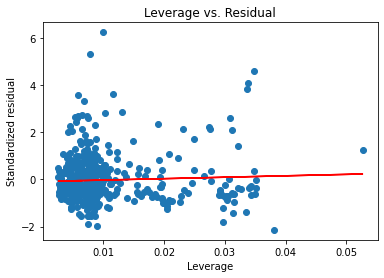

In [88]:
# 레버리지와 표준화된 잔차를 이용한 산점도 그래프
import numpy as np
from sklearn.linear_model import LinearRegression

plt.scatter(influence.hat_matrix_diag, inf_df.standard_resid)

fit = np.polyfit(influence.hat_matrix_diag, inf_df.standard_resid, 1)
fit_func = np.poly1d(fit)
plt.plot(influence.hat_matrix_diag, fit_func(influence.hat_matrix_diag), 'r')

plt.xlabel('Leverage')
plt.ylabel('Standardized residual')
plt.title('Leverage vs. Residual')
plt.show()

### 7.7 다중공선성

In [90]:
# VIF 확인
import statsmodels.api as sm
boston = sm.datasets.get_rdataset('Boston', package='MASS')
boston_df = boston.data

In [92]:
formula = 'medv~' + '+'.join(boston_df.iloc[:-1])

In [94]:
from patsy import dmatrices
y, X = dmatrices(formula, boston_df, return_type='dataframe')

In [95]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['features'] = X.columns
vif.sort_values('VIF Factor', ascending=False)

,VIF Factor,features
0,645.977937,Intercept
10,9.205542,tax
9,7.808198,rad
5,4.586920,nox
8,4.396007,dis
3,3.992503,indus
14,3.855684,medv
13,3.581585,lstat
7,3.100843,age
2,2.352186,zn


In [96]:
def get_vif(formula, df):
    from patsy import dmatrices
    y, X = dmatrices(formula, df, return_type='dataframe')

    vif = pd.DataFrame()
    from statsmodels.stats.outliers_influence import variance_inflation_factor

    vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif["features"] = X.columns
    vif.sort_values(by="VIF Factor", ascending=False, inplace=True)
    
    return vif

In [98]:
feature_cols = list(boston_df.columns[:-1])

while True:
    formula = 'medv~' + '+'.join(feature_cols) + '-1'
    vif = get_vif(formula, boston_df)

    if vif.iloc[0, 0] > 10:
        feature_cols.remove(vif.iloc[0, 1])
    else:
        break

vif

,VIF Factor,features
2,6.900077,indus
6,6.726973,lstat
5,4.678181,rad
4,3.968908,dis
1,2.299351,zn
0,2.067135,crim
3,1.086574,chas


## 8절. 회귀모형 성능평가

### 8.1 사이킷런의 모형 평가 방법

In [99]:
# scoring 매개변수 가능 값 탐색
from sklearn.metrics import SCORERS
SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

### 8.2 회귀모형 평가를 위한 scoring 속성

### 8.3 k-폴드 교차 검증

### 8.4 회귀모형 평가 함수

In [100]:
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split

diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3)

In [101]:
lasso = linear_model.Lasso()
model = lasso.fit(train_X, train_y)
model

Lasso()

In [102]:
pred = model.predict(test_X)
pred[:10]

array([161.35677448, 139.87745539, 130.2351721 , 142.87904817,
       143.43453123, 186.09061643, 164.07809371, 202.88797923,
       112.49407588, 172.47810123])

In [106]:
# mean squared error
from sklearn.metrics import mean_squared_error
import math

mse = mean_squared_error(test_y, pred)
rmse = math.sqrt(mse)

mse, rmse

(3395.145022149491, 58.26787298460011)

In [107]:
# mean absolute error
from sklearn.metrics import mean_absolute_error
mean_absolute_error(test_y, pred)

48.71376874620696

In [108]:
# explained variance score
from sklearn.metrics import explained_variance_score
explained_variance_score(test_y, pred)

0.3737698138762475

In [109]:
from sklearn.metrics import r2_score
r2_score(test_y, pred)

0.3670362034718291